# IE 582 Statistical Learning for Data Mining - Homework 3

## Task 1 – On the use of distance information for UwaveGesture Recognition Task

In [66]:
import random
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [67]:
#Reading train data
X_TRAIN = pd.read_csv("uWaveGestureLibrary_X_TRAIN",header=None,delim_whitespace=True)
Y_TRAIN = pd.read_csv("uWaveGestureLibrary_Y_TRAIN",header=None,delim_whitespace=True)
Z_TRAIN = pd.read_csv("uWaveGestureLibrary_Z_TRAIN",header=None,delim_whitespace=True)

In [68]:
#before concatenation delete other class information in Y and Z
Y_TRAIN = Y_TRAIN.iloc[: , 1:]
Z_TRAIN = Z_TRAIN.iloc[: , 1:]

In [70]:
#change column names for X,Y and Z

existedList_X = X_TRAIN.columns.values.tolist()

list2_X = []

for i in existedList_X:

    f = lambda i: 'x' + str(i)

    list2_X.append(f(i))

X_TRAIN.columns = list2_X
X_TRAIN = X_TRAIN.rename(columns={'x0':'class'})
X_TRAIN.head()
#----------------------------------------------

existedList_Y = Y_TRAIN.columns.values.tolist()

list2_Y = []

for i in existedList_Y:

    f = lambda i: 'y' + str(i)

    list2_Y.append(f(i))
    
Y_TRAIN.columns = list2_Y

#----------------------------------------------

existedList_Z = Z_TRAIN.columns.values.tolist()

list2_Z = []

for i in existedList_Z:

    f = lambda i: 'Z' + str(i)

    list2_Z.append(f(i))
    
Z_TRAIN.columns = list2_Z

In [71]:
Z_TRAIN.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,...,Z306,Z307,Z308,Z309,Z310,Z311,Z312,Z313,Z314,Z315
0,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573
4,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,-0.466022,...,1.867472,1.834319,1.756000,1.638582,1.521164,1.453266,1.515219,1.632637,1.750054,1.867472


In [72]:
df_ = pd.concat([X_TRAIN, Y_TRAIN, Z_TRAIN], axis=1, join_axes=[X_TRAIN.index])

In [73]:
#Reading test data
X_TEST = pd.read_csv("uWaveGestureLibrary_X_TEST",header=None,delim_whitespace=True)
Y_TEST = pd.read_csv("uWaveGestureLibrary_Y_TEST",header=None,delim_whitespace=True)
Z_TEST = pd.read_csv("uWaveGestureLibrary_Z_TEST",header=None,delim_whitespace=True)

#before concatenation delete other class information in Y and Z
Y_TEST = Y_TEST.iloc[: , 1:]
Z_TEST = Z_TEST.iloc[: , 1:]

#change column names for X,Y and Z for test data

existedList_x_test = X_TEST.columns.values.tolist()

list2_x_test = []

for i in existedList_x_test:

    f = lambda i: 'x' + str(i)

    list2_x_test.append(f(i))

X_TEST.columns = list2_x_test
X_TEST = X_TEST.rename(columns={'x0':'class'})
X_TEST.head()
#----------------------------------------------

existedList_y_test = Y_TEST.columns.values.tolist()

list2_y_test = []

for i in existedList_y_test:

    f = lambda i: 'y' + str(i)

    list2_y_test.append(f(i))
    
Y_TEST.columns = list2_y_test

#----------------------------------------------

existedList_z_test = Z_TEST.columns.values.tolist()

list2_z_test = []

for i in existedList_z_test:

    f = lambda i: 'Z' + str(i)

    list2_z_test.append(f(i))
    
Z_TEST.columns = list2_z_test

#----------------------------------------------
# concat all data
df_test = pd.concat([X_TEST, Y_TEST, Z_TEST], axis=1, join_axes=[X_TEST.index])

### a) Suppose we decided to apply a nearest-neighbor (NN) classifier to find the labels of test instances. You can use the strategy you employed when you apply PCA to this data in Homework 2 (i.e. concatenation of the axes). Propose two distance measures for computing similarity between two time series. The distance calculation on the concatenated time series implicitly weights the distances of each axis in an equal way. For each distance measure alternative, use the training data to identify the ideal value of k which minimizes the error of a 10-fold cross-validation.

In [74]:
df_train = df_.loc[:, df_.columns != 'class']
y_train = df_. iloc[:, 0]

In [75]:
knn_model = KNeighborsClassifier().fit(df_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### p: int, default=2
#### Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1),  and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [76]:
# identify the ideal value of k which minimizes the error of a 10-fold cross-validation using 
# using manhattan_distance (l1)

# range of k we want to try
k_range = range(1, 11)

# empty list to store scores
k_scores_manhattan = []

for k in k_range:
    k=k+1
    knn_model = KNeighborsClassifier(n_neighbors=k, p=1)
    # obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores_manhattan = cross_val_score(knn_model, df_train, y_train, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores_manhattan.append(scores_manhattan.mean())
k_scores_manhattan

[0.943083645443196,
 0.9553932584269663,
 0.9520474406991261,
 0.9498252184769038,
 0.949812734082397,
 0.9498127340823969,
 0.9431210986267166,
 0.9386641697877651,
 0.933083645443196,
 0.9330961298377028]

Max of list 0.9553932584269663


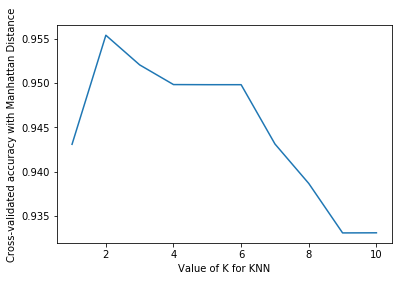

In [77]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores_manhattan)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy with Manhattan Distance')

print('Max of list', max(k_scores_manhattan))

In [78]:
#find the max value index
max_index_manhattan = k_scores_manhattan. index(max(k_scores_manhattan))
max_index_manhattan

1

In [79]:
# identify the ideal value of k which minimizes the error of a 10-fold cross-validation using 
# using euclidean_distance (l2)

# range of k we want to try
k_range = range(1, 11)

# empty list to store scores
k_scores_euclidean = []

for k in k_range:
    k=k+1
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)
    scores_euclidean = cross_val_score(knn_model, df_train, y_train, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores_euclidean.append(scores_euclidean.mean())
k_scores_euclidean

[0.9352933832709114,
 0.9441947565543071,
 0.9420224719101122,
 0.9386641697877651,
 0.937565543071161,
 0.9386766541822722,
 0.9297378277153558,
 0.9275031210986269,
 0.9275156054931337,
 0.9241573033707866]

Max of list 0.9441947565543071


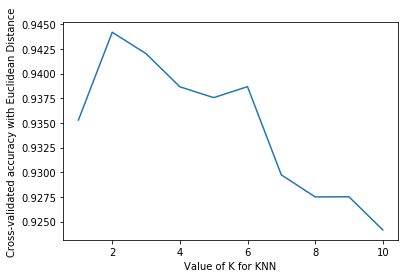

In [80]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores_euclidean)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy with Euclidean Distance')

print('Max of list', max(k_scores_euclidean))

In [81]:
#find the max value index
max_index_euclidean = k_scores_euclidean. index(max(k_scores_euclidean))
max_index_euclidean

1

### b) Using the value of k (identified for each distance measure) in part (a) and evaluate your final performance on the test data and present your results in a (8-by-8) confusion matrix, showing the counts for actual and predicted labels. In addition, quote the runtime and accuracy for your results

In [83]:
df_test_ = df_test.loc[:, df_test.columns != 'class']
classifier_manhattan = KNeighborsClassifier(n_neighbors=1, p = 1)
classifier_manhattan.fit(df_train, y_train)
y_pred_manhattan = classifier_manhattan.predict(df_test_)
y_pred_manhattan

array([5., 1., 4., ..., 6., 8., 4.])

In [84]:
confusion_matrix_manhattan = confusion_matrix(y_test ,y_pred_manhattan)
confusion_matrix_manhattan

array([[430,   0,   0,   2,   0,   5,   0,   0],
       [  1, 451,   0,   0,   0,   0,   0,   0],
       [  2,   0, 418,   0,  16,  14,   4,   0],
       [  3,   0,   0, 392,  40,  11,   0,   4],
       [  3,   0,   9,   5, 415,   1,   0,   0],
       [  3,   0,   5,  13,  16, 411,   0,   1],
       [  0,   0,   2,   0,   0,   0, 445,   0],
       [  0,   0,   0,   3,   1,   0,   0, 456]])

In [85]:
#accuracy for manhattan
def accuracy(confusion_matrix_manhattan):
    diagonal_sum = confusion_matrix_manhattan.trace()
    sum_of_all_elements = confusion_matrix_manhattan.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(confusion_matrix_manhattan)

0.954215522054718

In [86]:
classifier_euclidean = KNeighborsClassifier(n_neighbors=1, p = 2)
classifier_euclidean.fit(df_train, y_train)
y_pred_euclidean = classifier_manhattan.predict(df_test_)
y_pred_euclidean

array([5., 1., 4., ..., 6., 8., 4.])

In [87]:
confusion_matrix_euclidean = confusion_matrix(y_test, classifier_euclidean.predict(df_test_))
confusion_matrix_euclidean

array([[429,   0,   0,   2,   0,   5,   1,   0],
       [  1, 451,   0,   0,   0,   0,   0,   0],
       [  2,   0, 417,   1,  15,  15,   4,   0],
       [  6,   0,   0, 379,  49,  11,   0,   5],
       [  3,   0,  10,   3, 415,   2,   0,   0],
       [  6,   0,   6,  12,  17, 407,   0,   1],
       [  0,   0,   3,   0,   0,   0, 444,   0],
       [  0,   0,   0,   4,   2,   0,   0, 454]])

In [88]:
#accuracy for euclidean
def accuracy(confusion_matrix_euclidean):
    diagonal_sum = confusion_matrix_euclidean.trace()
    sum_of_all_elements = confusion_matrix_euclidean.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(confusion_matrix_euclidean)

0.948073701842546

### c) The observations from different axes are weighted equally if we compute the distance over eachaxis and sum them to obtain a final similarity measure. Is this reasonable? For example, we cancompute the distance as below:

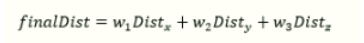
    
### where DistX is the distance based on the acceleration only on X axis, DistY is for Y axis and soon. Do you think weighting the distances over different axes to obtain a final similarity measure makes sense for classification? Why?

This approach will change the model. 
If one of the axes forming the model is more dominant than the others, we can conclude this situation more positively with the weight values we will give.

## Task 2 – Linear models on alternative representations of the data

### a) Train a logistic regression model on the training data and use the model to make a prediction on the test data. Note that you will obtain probabilistic predictions (i.e. probability of a time series being from Class 3 if you encoded Class 3 as 1 in binary classification setting). This will require you to select a threshold since 0.5 as a threshold may not work well under this imbalanced class setting. To make things easier, use the ratio of Class 3 instances in the training data as threshold. Use the learned model to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

In [90]:
train_data = MinMaxScaler().fit_transform(df_train)
#use the ratio of Class 3 instances in the training data as threshold.
#y_train = df_. iloc[:, 0] - - specified in the top lines.
y_train_binaryForm = (y_train == 3)*1
#apply logistic regression model on the training data
lr = LogisticRegression(random_state=0)
lr.fit(train_data, y_train_binaryForm)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
#df_test_ = df_test.loc[:, df_test.columns != 'class']  - specified in the top lines.
test_data = MinMaxScaler().fit_transform(df_test_)

#y_test = df_test. iloc[:, 0] 
y_test_binaryForm = (y_test == 3)*1

#we use predict_proba method that returns the class probabilities for each data point as mention in the part a
prediction_probability = lr.predict_proba(test_data)[:,1]
#Return the mean accuracy on the given test data and labels.
lr.score(test_data, y_test_binaryForm)

0.9410943606923506

In [111]:
#use the ratio of Class 3 i
class3_ratio = sum(y_train_binaryForm)/len(y_train_binaryForm)
y_predicted = (prediction_probability >= class3_ratio)
confusion_matrix(y_test_binaryForm, y_predicted)

array([[2987,  141],
       [  84,  370]])

### b) An advantage of logistic regression is related to the interpretability however when we have large number of features together with a method without penalization, it is harder to interpret the results. Therefore, an alternative way is to train a logistic regression model with lasso penalties. This will require you setting of penalization term (namely lambda). Use 10-fold cross-validation to determine your ideal lambda level based on binomial deviance (Note that we have used accuracy as primary metric to determine the lambda in class, however this strategy may not work well for the imbalanced data). You can check http://www.inf.ed.ac.uk/teaching/courses/mlsc/Notes/Lecture4/MLSC_Lec4.pdf for details of binomial deviance. This is also referred to as logistic loss. If you are using “glmnet” package in R, “type.measure” can be set to “deviance” which is the default value. If you are Python user, sklearn module has “LogisticRegressionCV” function in which you can provide the scorer as “metrics.log_loss”.

In [112]:
#logistic regression model with a default penalty
#Penalized logistic regression imposes a penalty to the logistic model for having too many variables.
#This results in shrinking the coefficients of the less contributive variables toward zero. 
#This is also known as regularization
model_tuning = LogisticRegressionCV(max_iter=10000)
model_tuning.fit(train_data, y_train_binaryForm)
tuning_probability = model_tuning.predict_proba(test_data)[:,1]
tuning_prediction = (tuning_probability  >= class3_train_ratio)*1

confusion_matrix(y_test_binaryForm, tuning_prediction)

array([[2947,  181],
       [  57,  397]])

In [113]:
#accuracy score before gridSearchCV operation 
accuracy_score(y_test_binaryForm, tuning_prediction)

0.9335566722501396

In [114]:
C_values = [0.001, 0.01, 0.05, 0.1, 1., 100.]

logit_searcher = LogisticRegressionCV(Cs=C_values, cv=10, verbose=1, n_jobs=-1)
logit_searcher.fit(train_data, y_train_binaryForm)
tuning_probabilityCV = logit_searcher.predict_proba(test_data)[:,1]
tuning_predictionCV = (tuning_probabilityCV >= class3_train_ratio)*1
confusion_matrix(y_test_binary, tuning_predictionCV)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished


array([[2950,  178],
       [  59,  395]])

In [98]:
# we reach this output : tuned hpyerparameters :(best parameters)  {'Cs': 0.05}
logit_searcher.C_

array([0.05])

In [115]:
#accuracy score after gridSearchCV operation 
accuracy_score(y_test_binaryForm, tuning_predictionCV)

0.9338358458961474

#### When we look at confusion matrix after model tuning we can see that TP and TN values are increased by a very small amount. Our result did not change much, but we can say that we saw the expected improvement to a small extent.

#### Log loss is an important criterion for classification based on predictive probability values. The lower the value, the higher the model success.

In [116]:
#log loss
metrics.log_loss(y_test_binaryForm, tuning_predictionCV)

2.2852686582737043

In [118]:
logit_searcher.coef_

array([[-0.05909562, -0.05917631, -0.05924707, -0.0593543 , -0.05929441,
        -0.05898848, -0.05950586, -0.06075558, -0.06224534, -0.06381453,
        -0.06546494, -0.06589826, -0.06618566, -0.06694548, -0.06770529,
        -0.06830805, -0.06870509, -0.06911779, -0.06969584, -0.07053   ,
        -0.07107242, -0.07248793, -0.07248698, -0.07253842, -0.07247951,
        -0.0722694 , -0.07290445, -0.07339924, -0.07373195, -0.07383763,
        -0.07436183, -0.07504033, -0.07581947, -0.07582477, -0.07580124,
        -0.07534742, -0.07491718, -0.07442375, -0.07447491, -0.07500769,
        -0.07516982, -0.07524762, -0.07430186, -0.07191032, -0.07016703,
        -0.0626505 , -0.05468082, -0.04995426, -0.05068009, -0.0487571 ,
        -0.04661739, -0.04502255, -0.04112342, -0.04684647, -0.04905348,
        -0.05206622, -0.0551736 , -0.05294834, -0.05079464, -0.05020028,
        -0.0507144 , -0.05017019, -0.04925791, -0.04812382, -0.04702759,
        -0.04710257, -0.04603147, -0.04500806, -0.0

In [119]:
odds = np.exp(logit_searcher.coef_[0])
a = pd.DataFrame(odds, 
             df_test_.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [122]:
print(a.to_string())

          coef
x250  1.130705
x285  1.129812
x284  1.129223
x251  1.127808
x295  1.125824
x296  1.125579
x286  1.124285
x294  1.122382
y166  1.121662
x300  1.121192
x261  1.120280
x260  1.119955
x290  1.119864
y167  1.119621
x249  1.119520
x252  1.119388
x291  1.118819
x262  1.118544
x293  1.118208
x287  1.117942
y165  1.117810
x263  1.117784
x289  1.117726
x301  1.117429
x264  1.117338
x283  1.117223
x259  1.117158
x292  1.116774
x288  1.116416
x299  1.116126
y164  1.115747
y163  1.115338
x258  1.114427
y168  1.114193
x253  1.113569
x302  1.113368
x298  1.113251
x297  1.113115
x257  1.112959
y169  1.111551
y171  1.111418
x265  1.111352
x248  1.111151
x282  1.110536
x254  1.110381
y170  1.110120
y162  1.109800
y172  1.109453
x256  1.109141
x255  1.109111
x266  1.107512
y173  1.106920
x281  1.106419
x303  1.105321
x247  1.105118
y174  1.103798
x273  1.103785
y161  1.103593
x267  1.103385
x272  1.101595
x246  1.100752
x268  1.099788
x236  1.098223
x274  1.097944
y175  1.097366
x241  1.09

 The coefficient for a term represents the change in the mean response associated with a change in that term, while the other terms in the model are held constant.  The sign of the coefficient indicates the direction of the relationship between the term and the response. A similar distribution is seen when looking at the coefficients. 

### c) An alternative way to represent the feature matrix on a new space to introduce nonlinear relations is to use distance matrix as a feature matrix. For example, we have 896 training instances and the observations over time are used as features in the previous tasks (i.e. we worked on N by 3T matrix). Recall that multidimensional scaling also works on distance matrices and we have mentioned that it can handle nonlinear relations (Homework 2 also aims at revealing such an information). This non-linearity stems from the use of Euclidean distances. Use of Euclidean distance as input to a learning algorithm allows for handling nonlinear relations*. In other words, your features keep the nonlinear information. 
### *We will have further discussion on this behavior when we cover support vector machines. This type of transformations are discussed under “distance-based kernels” which is out of scope for now. Additional information is provided in case you are willing to perform research on distance based transformations. Given this information, you are expected to transform your training data to distance information (i.e. N by N matrix). Note that you need to perform a similar transformation to your test data. In other words, you need to calculate the distance of each test instance to training instance to obtain a distance based representation for your test data. This will be an Ntest by N matrix (Ntest refers to the number of test instances) where each entry (i,j) refers to the distance of test time series i to the training time series j. You can use Euclidean distance as your distance measure.
### Perform the same training and test strategy as in part b but use the distances as your new feature matrices. Comment on the regression coefficients. What do they imply under this new representation setting? 

In [123]:
distance_train = euclidean_distances(train_data, train_data)
distance_test = euclidean_distances(test_data, train_data)

In [124]:
dist_model = LogisticRegressionCV(cv=10,random_state=0, penalty='l2', scoring="neg_log_loss", max_iter = 10000)
dist_model.fit(distance_train, y_train_binaryForm)
distance_probability = dist_model.predict_proba(distance_test)[:,1]
predicted_dist = (distance_probability >= class3_train_ratio)*1

confusion_matrix(y_test_binary, predicted_dist)

array([[3117,   11],
       [  51,  403]])

In [125]:
dist_model.coef_

array([[-1.31587217e-02,  7.55541208e-02,  9.42616354e-02,
        -7.35456864e-01, -3.99772833e-02, -6.45454666e-02,
         2.69646962e-02,  1.57881158e-03, -8.74380041e-03,
         3.45518252e-01,  7.74023645e-02,  4.98620844e-02,
        -4.87013684e-02,  2.92535343e-03, -5.10137861e-02,
         1.30880126e-01,  7.96738461e-02, -3.15580887e-02,
         1.19285034e-01, -1.74970477e-02,  1.94387450e-03,
        -8.94056320e-02, -3.54785228e-02,  1.00136172e-01,
        -4.18341711e-02,  1.09745220e-01, -1.33474350e-01,
         5.95624243e-02,  4.79142685e-02,  3.13805613e-02,
         1.99501690e-02,  5.36591170e-02, -3.14768432e-02,
        -3.16574454e-02,  2.23489623e-01,  1.57902882e-01,
        -3.84748429e-02, -2.73935967e-03, -3.72035306e-03,
         2.81644134e-02,  9.25762167e-02,  1.25737765e-01,
         4.55709917e-02, -3.58573103e-02,  5.04533957e-02,
        -2.13413646e-02,  7.70193449e-02, -8.00869308e-02,
         1.13960031e-01,  8.16864242e-02, -6.82345229e-0

### d) Provide an overall comparison on the results you obtain for each part (over all tasks). You can compare test accuracy of each alternative method you developed.

The use of Euclidean distance, which also allows non-linear processing and penalty method had a significant impact on model success. We can understand this by looking at the obtained accuracy rate and confusion matrix.

In the logistic regression model tuning phase, the best C value did not change much on accuracy, it may be because we do not have too many features.

From the applied two distance matrices, manhattan gives better result